In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
ckpt_path = './exp_baseline'

with open(os.path.join(ckpt_path, 'results.pkl'), 'rb') as f:
    results = pickle.load(f)

In [3]:
len(results)

43

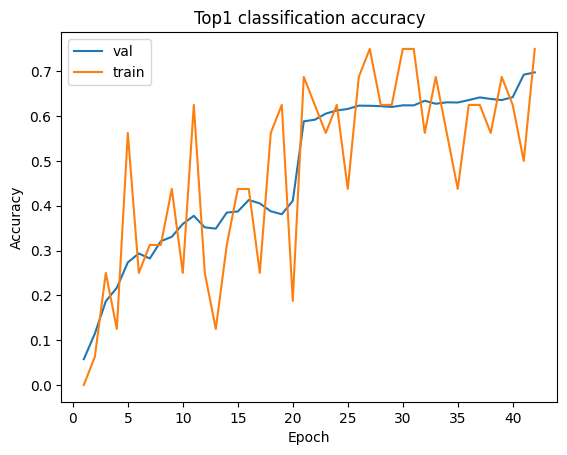

In [4]:
val_top1_accs = [results[i]['val']['top1'] for i in range(0, len(results))][1:]
train_top1_accs = [results[i]['train']['top1'] for i in range(0, len(results))][1:]
epochs = [i for i in range(0, len(results))][1:]

plt.plot(epochs, val_top1_accs, label='val')
plt.plot(epochs, train_top1_accs, label='train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, len(results), 5))
plt.title('Top1 classification accuracy')
plt.legend()
# plt.savefig(os.path.join(ckpt_path, 'val_top1_accs.png')

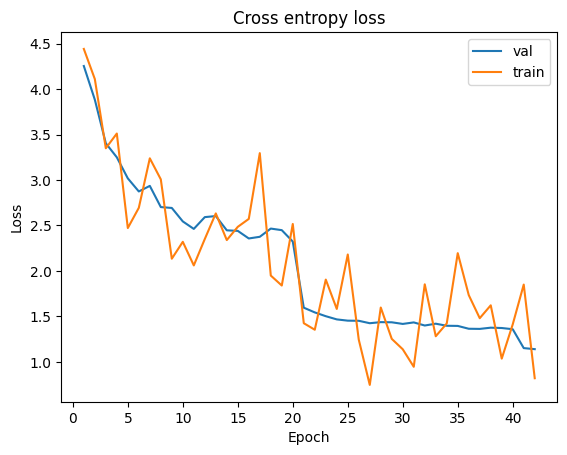

In [5]:
val_loss = [results[i]['val']['loss'] for i in range(0, len(results))][1:]
train_loss = [results[i]['train']['loss'] for i in range(0, len(results))][1:]
epochs = [i for i in range(0, len(results))][1:]

plt.plot(epochs, val_loss, label='val')
plt.plot(epochs, train_loss, label='train')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, len(results), 5))
plt.title('Cross entropy loss')
plt.legend()
# plt.savefig(os.path.join(ckpt_path, 'val_top1_accs.png'))